<a href="https://colab.research.google.com/github/alisharifi2000/ComplexNetwork_TMU/blob/main/ComplexNetworkProject_phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [2]:
import networkx as nx
import pandas as pd
import random
%matplotlib inline
from matplotlib import pyplot as plt
import collections
import operator

In [3]:
root = '/gdrive/My Drive/ComplexNetwork/'
G = nx.read_edgelist(root + 'p2p-Gnutella06.txt')
print(nx.info(G))

Graph with 8717 nodes and 31525 edges


# Counting Neighbors 

In [4]:
node_to_neighbors_mapping = [(node, len(list(G.neighbors(node)))) for node in G.nodes()]
node_to_neighbors_mapping[:5]

[('0', 12), ('1', 4), ('2', 5), ('3', 12), ('4', 6)]

In [5]:
node_to_neighbors_mapping.sort(key=operator.itemgetter(1))
node_to_neighbors_mapping[-10:]

[('173', 67),
 ('300', 67),
 ('558', 69),
 ('293', 69),
 ('299', 69),
 ('556', 70),
 ('31', 70),
 ('176', 72),
 ('356', 73),
 ('6494', 115)]

# Degree Centrality 

In [6]:
# degree_centrality = sorted(nx.degree_centrality(G).items(), key=lambda x : x[1], reverse=True)
# degree_centrality[:5]

# Betweenness Centrality

In [7]:
# betwenness_centrality = sorted(nx.betweenness_centrality(G).items(), key=lambda x : x[1], reverse=True)
# betwenness_centrality[:5]

# Closeness Centrality

In [8]:
# closeness_centrality = sorted(nx.closeness_centrality(G).items(), key=lambda x : x[1], reverse=True)
# closeness_centrality[:5]

# make dataframe by centrality

In [9]:
# df_degree = pd.DataFrame(degree_centrality, columns=['node', 'degree_c'])
# df_degree.set_index('node',inplace = True)
# df_between = pd.DataFrame(betwenness_centrality, columns=['node', 'between_c'])
# df_between.set_index('node',inplace = True)
# df_close = pd.DataFrame(closeness_centrality, columns=['node', 'close_c'])
# df_close.set_index('node',inplace = True)

In [10]:
# df_degree.head(5)

In [11]:
# df_between.head(5)

In [12]:
# df_close.head(5)

In [13]:
# result = pd.concat([df_degree, df_between,df_close], axis=1)
# result.head(5)

In [14]:
# # score 1 : (degree + between + close)/3
# result['score1'] = (result['degree_c'] + result['between_c'] + result['close_c'])/3
# # score 2 : (degree + 2 * between + close)/4
# result['score2'] = (result['degree_c'] + 2*result['between_c'] + result['close_c'])/4
# # score 3 : (degree + between + 2* close)/4
# result['score3'] = (result['degree_c'] + result['between_c'] + 2*result['close_c'])/4
# # score 4 : (2*degree + between +  close)/4
# result['score4'] = (2*result['degree_c'] + result['between_c'] + result['close_c'])/4
# result.head(5)

In [15]:
# result.to_csv('/gdrive/My Drive/ComplexNetwork/result.csv')

In [16]:
result = pd.read_csv('/gdrive/My Drive/ComplexNetwork/result.csv')
result.head()

,Unnamed: 0,Unnamed: 0.1,degree_c,between_c,close_c,score1,score2,score3,score4
0,0,6494,0.013194,0.031051,0.308914,0.117720,0.096052,0.165518,0.091588
1,1,356,0.008375,0.008823,0.288313,0.101837,0.078583,0.148456,0.078472
2,2,176,0.008261,0.006083,0.285555,0.099966,0.076496,0.146364,0.077040
3,3,556,0.008031,0.007228,0.286777,0.100679,0.077316,0.147203,0.077517
4,4,31,0.008031,0.005283,0.285480,0.099598,0.076019,0.146069,0.076706


# SI model

\begin{equation}
    \text{Coverage} = \frac{\text{infectected node in end}}{\text{total node number}}
\end{equation}


\begin{equation}
    \text{Speed} = \frac{\text{infectected node in end}}{\text{number of iteration}}
\end{equation}

\begin{equation}
    \text{Score1} = \frac{\text{degree centrality}+ \text{closeness centrality}+\text{betweenness centerality}}{3}
\end{equation}

\begin{equation}
    \text{Score2} = \frac{\text{degree centrality}+ \text{closeness centrality}+2*\text{betweenness centerality}}{4}
\end{equation}

\begin{equation}
    \text{Score3} = \frac{\text{degree centrality}+ 2*\text{closeness centrality}+\text{betweenness centerality}}{4}
\end{equation}

\begin{equation}
    \text{Score4} = \frac{2*\text{degree centrality}+ \text{closeness centrality}+\text{betweenness centerality}}{4}
\end{equation}

SI model for 50 iteration

| Condition | Coverage | Speed |
| --- | --- | --- |
| 5 nodes  , score 1 | 0.6159229092577722 | 107.38 |
| 10 nodes , score 1 | 0.6125960766318688 | 106.8 |
| --- | --- | --- |
| 5 nodes  , score 2 | 0.6075484685098084 | 105.92 |
| 10 nodes  , score 2 | 0.6176436847539291 | 107.68 |
| --- | --- | --- |
| 5 nodes  , score 3 |0.6035333256854423  |  105.22|
| 10 nodes  , score 3 |0.6167259378226454  | 107.52 |
| --- | --- | --- |
| 5 nodes  , score 4 |0.6081220603418608  | 106.02 |
| 10 nodes  , score 4 | 0.6105311460364804 | 106.44 |


In [17]:
!pip install ndlib

import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep

In [18]:
pos = nx.spring_layout(G)

## Score1

### 5 nodes with highest score1 is infected



In [19]:
result.sort_values('score1',ascending=False).head(5)

,Unnamed: 0,Unnamed: 0.1,degree_c,between_c,close_c,score1,score2,score3,score4
0,0,6494,0.013194,0.031051,0.308914,0.117720,0.096052,0.165518,0.091588
16,16,6836,0.007343,0.011533,0.287723,0.102200,0.079533,0.148580,0.078485
1,1,356,0.008375,0.008823,0.288313,0.101837,0.078583,0.148456,0.078472
13,13,174,0.007572,0.007704,0.289328,0.101535,0.078077,0.148483,0.078044
20,20,172,0.007113,0.005875,0.290562,0.101183,0.077356,0.148528,0.077666


In [20]:
# Model selection
model = ep.SIModel(G)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter("fraction_infected", 0.05)

# 5 nodes with highest score1 is infected.
infected_nodes = [6494,6836,356,174,172]


model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(51)

100%|██████████| 51/51 [00:02<00:00, 19.29it/s]


In [21]:
for i,iter in enumerate(list(iterations)):
    if i%10 == 0 or i == 50:
        print('iteration : ',i)
        print(iter['node_count'])

iteration :  0
{0: 8282, 1: 435}
iteration :  10
{0: 7856, 1: 861}
iteration :  20
{0: 6956, 1: 1761}
iteration :  30
{0: 5745, 1: 2972}
iteration :  40
{0: 4486, 1: 4231}
iteration :  50
{0: 3472, 1: 5245}


In [22]:
coverage = iterations[50]['node_count'][1]/8717 
print('coverage network : ', coverage)
speed = iterations[50]['node_count'][1]/50 
print('coverage speed network : ', speed)

coverage network :  0.6016978318228748
coverage speed network :  104.9


In [23]:
start_edges = []
for key,value in iterations[0]['status'].items():
    if value == 1:
        start_edges.append(key)

len(start_edges)

435

In [24]:
end_edges = []
for i in range(51):
    for key,value in iterations[i]['status'].items():
        if value == 1:
            if key not in end_edges:
                end_edges.append(key)

len(end_edges)

5245

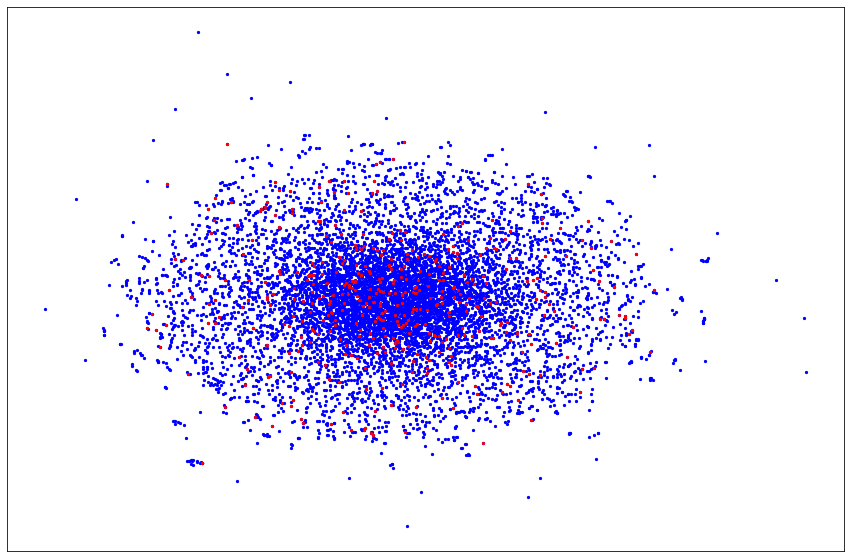

In [25]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(start_edges, pos,node_color = 'red', node_size=5)

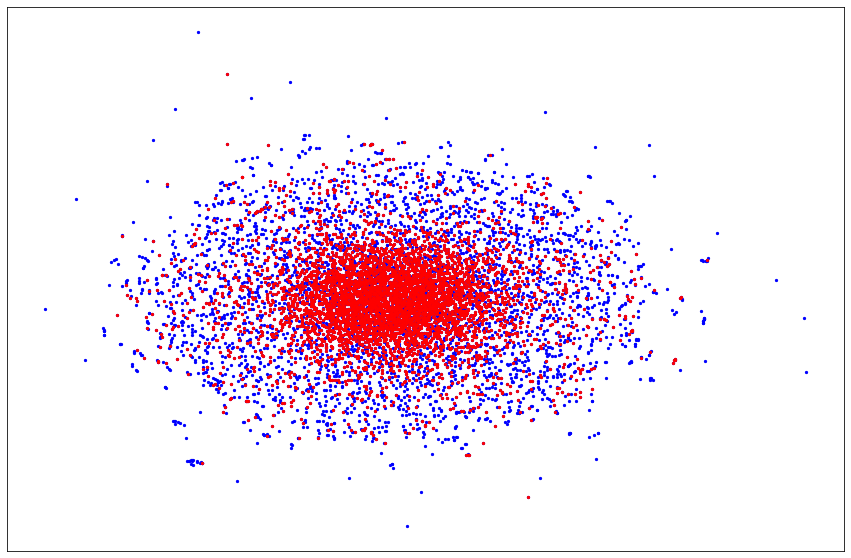

In [26]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(end_edges, pos,node_color = 'red', node_size=5)

### 10 nodes with highest score1 is infected



In [27]:
result.sort_values('score1',ascending=False).head(10)

,Unnamed: 0,Unnamed: 0.1,degree_c,between_c,close_c,score1,score2,score3,score4
0,0,6494,0.013194,0.031051,0.308914,0.117720,0.096052,0.165518,0.091588
16,16,6836,0.007343,0.011533,0.287723,0.102200,0.079533,0.148580,0.078485
1,1,356,0.008375,0.008823,0.288313,0.101837,0.078583,0.148456,0.078472
13,13,174,0.007572,0.007704,0.289328,0.101535,0.078077,0.148483,0.078044
20,20,172,0.007113,0.005875,0.290562,0.101183,0.077356,0.148528,0.077666
14,14,99,0.007343,0.007206,0.287942,0.100830,0.077424,0.147608,0.077458
6,6,293,0.007916,0.006268,0.288104,0.100763,0.077139,0.147598,0.077551
3,3,556,0.008031,0.007228,0.286777,0.100679,0.077316,0.147203,0.077517
18,18,246,0.007228,0.006182,0.288609,0.100673,0.077050,0.147657,0.077312
12,12,297,0.007572,0.007022,0.285958,0.100184,0.076893,0.146627,0.077031


In [28]:
# Model selection
model = ep.SIModel(G)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter("fraction_infected", 0.05)

# 5 nodes with highest score1 is infected.
infected_nodes = [6494,6836,356,174,172,99,293,556,246,297]


model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(51)

100%|██████████| 51/51 [00:02<00:00, 19.33it/s]


In [29]:
for i,iter in enumerate(list(iterations)):
    if i%10 == 0 or i == 50:
        print('iteration : ',i)
        print(iter['node_count'])

iteration :  0
{0: 8282, 1: 435}
iteration :  10
{0: 7819, 1: 898}
iteration :  20
{0: 6782, 1: 1935}
iteration :  30
{0: 5543, 1: 3174}
iteration :  40
{0: 4320, 1: 4397}
iteration :  50
{0: 3375, 1: 5342}


In [30]:
coverage = iterations[50]['node_count'][1]/8717 
print('coverage network : ', coverage)
speed = iterations[50]['node_count'][1]/50 
print('coverage speed network : ', speed)

coverage network :  0.6128255133646897
coverage speed network :  106.84


In [31]:
start_edges = []
for key,value in iterations[0]['status'].items():
    if value == 1:
        start_edges.append(key)

len(start_edges)

435

In [32]:
end_edges = []
for i in range(51):
    for key,value in iterations[i]['status'].items():
        if value == 1:
            if key not in end_edges:
                end_edges.append(key)

len(end_edges)

5342

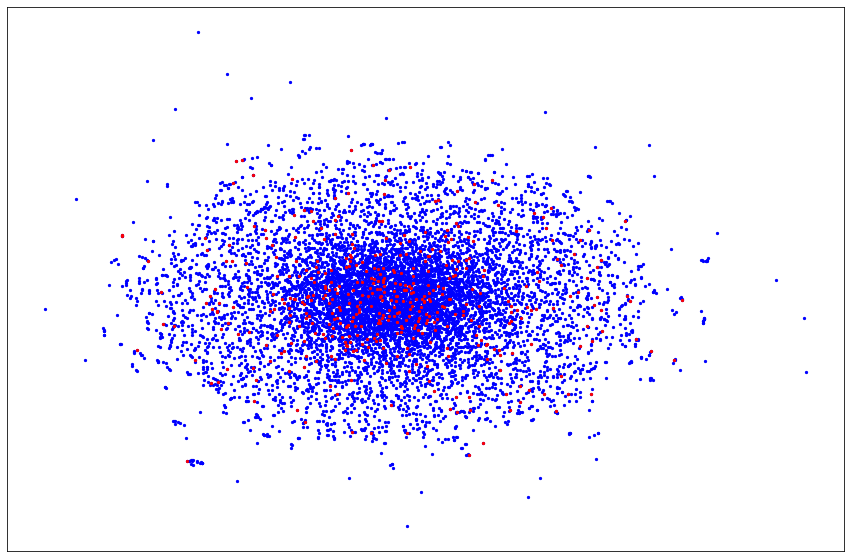

In [33]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(start_edges, pos,node_color = 'red', node_size=5)

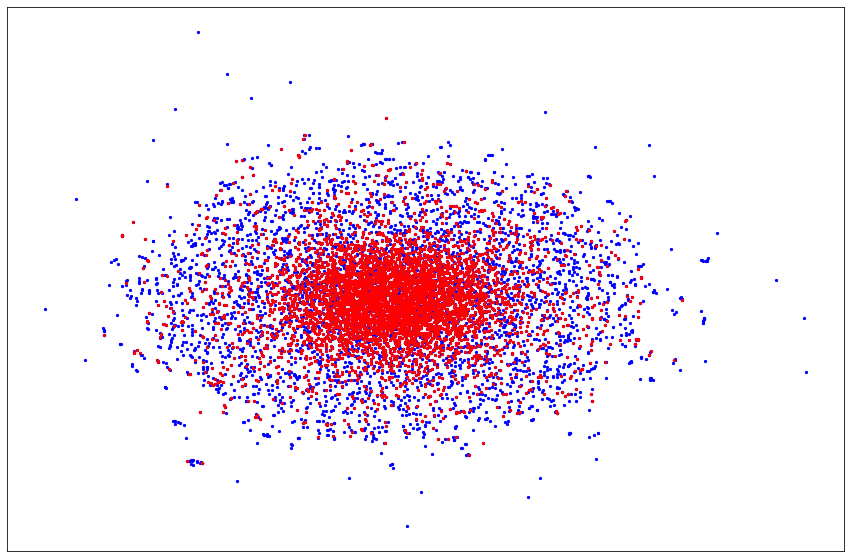

In [34]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(end_edges, pos,node_color = 'red', node_size=5)

## Score2

### 5 nodes with highest score2 is infected

In [35]:
result.sort_values('score2',ascending=False).head(5)

,Unnamed: 0,Unnamed: 0.1,degree_c,between_c,close_c,score1,score2,score3,score4
0,0,6494,0.013194,0.031051,0.308914,0.117720,0.096052,0.165518,0.091588
16,16,6836,0.007343,0.011533,0.287723,0.102200,0.079533,0.148580,0.078485
1,1,356,0.008375,0.008823,0.288313,0.101837,0.078583,0.148456,0.078472
13,13,174,0.007572,0.007704,0.289328,0.101535,0.078077,0.148483,0.078044
14,14,99,0.007343,0.007206,0.287942,0.100830,0.077424,0.147608,0.077458


In [36]:
# Model selection
model = ep.SIModel(G)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter("fraction_infected", 0.05)

# 5 nodes with highest score1 is infected.
infected_nodes = [6494,6836,356,174,99]


model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(51)

100%|██████████| 51/51 [00:02<00:00, 19.35it/s]


In [37]:
coverage = iterations[50]['node_count'][1]/8717 
print('coverage network : ', coverage)
speed = iterations[50]['node_count'][1]/50 
print('coverage speed network : ', speed)

coverage network :  0.6127107949982792
coverage speed network :  106.82


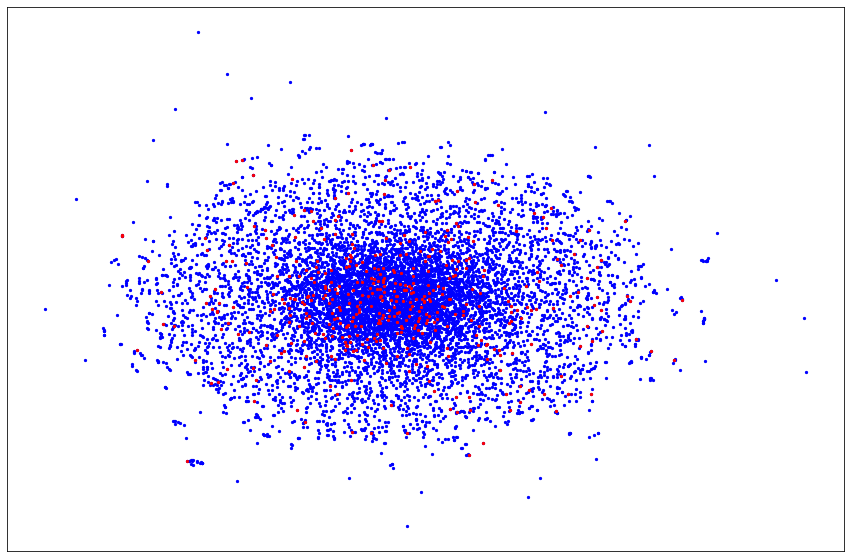

In [38]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(start_edges, pos,node_color = 'red', node_size=5)

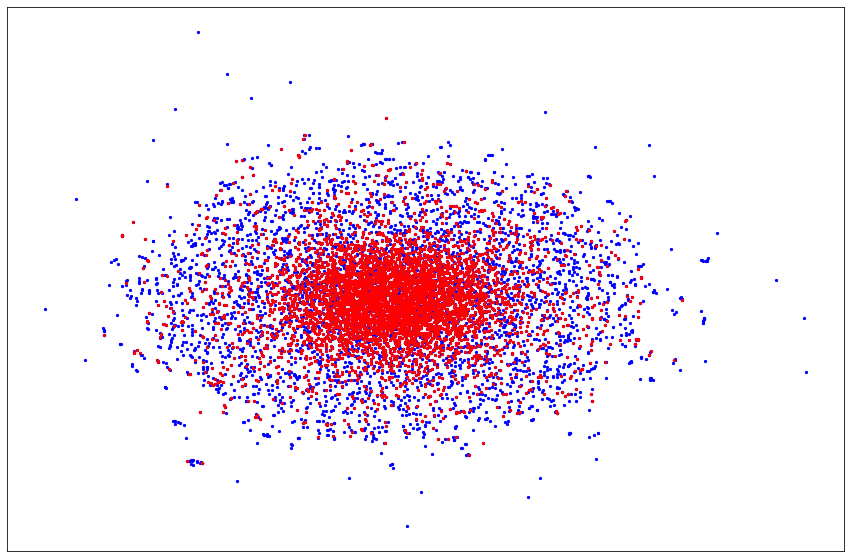

In [39]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(end_edges, pos,node_color = 'red', node_size=5)

### 10 nodes with highest score2 is infected

In [40]:
result.sort_values('score2',ascending=False).head(10)

,Unnamed: 0,Unnamed: 0.1,degree_c,between_c,close_c,score1,score2,score3,score4
0,0,6494,0.013194,0.031051,0.308914,0.117720,0.096052,0.165518,0.091588
16,16,6836,0.007343,0.011533,0.287723,0.102200,0.079533,0.148580,0.078485
1,1,356,0.008375,0.008823,0.288313,0.101837,0.078583,0.148456,0.078472
13,13,174,0.007572,0.007704,0.289328,0.101535,0.078077,0.148483,0.078044
14,14,99,0.007343,0.007206,0.287942,0.100830,0.077424,0.147608,0.077458
20,20,172,0.007113,0.005875,0.290562,0.101183,0.077356,0.148528,0.077666
3,3,556,0.008031,0.007228,0.286777,0.100679,0.077316,0.147203,0.077517
6,6,293,0.007916,0.006268,0.288104,0.100763,0.077139,0.147598,0.077551
18,18,246,0.007228,0.006182,0.288609,0.100673,0.077050,0.147657,0.077312
12,12,297,0.007572,0.007022,0.285958,0.100184,0.076893,0.146627,0.077031


In [41]:
# Model selection
model = ep.SIModel(G)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter("fraction_infected", 0.05)

# 5 nodes with highest score1 is infected.
infected_nodes = [6494,6836,356,174,99,172,556,293,246,297]


model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(51)

100%|██████████| 51/51 [00:02<00:00, 19.25it/s]


In [42]:
coverage = iterations[50]['node_count'][1]/8717 
print('coverage network : ', coverage)
speed = iterations[50]['node_count'][1]/50 
print('coverage speed network : ', speed)

coverage network :  0.6064012848457038
coverage speed network :  105.72


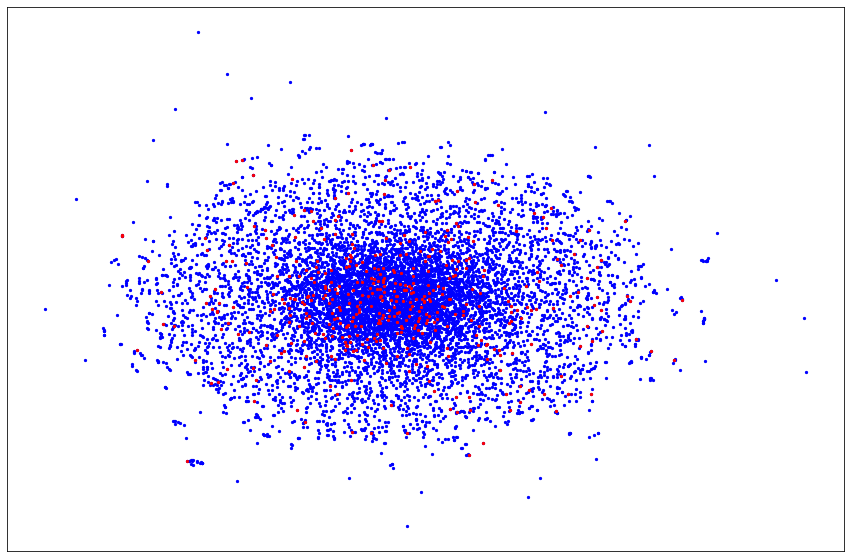

In [43]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(start_edges, pos,node_color = 'red', node_size=5)

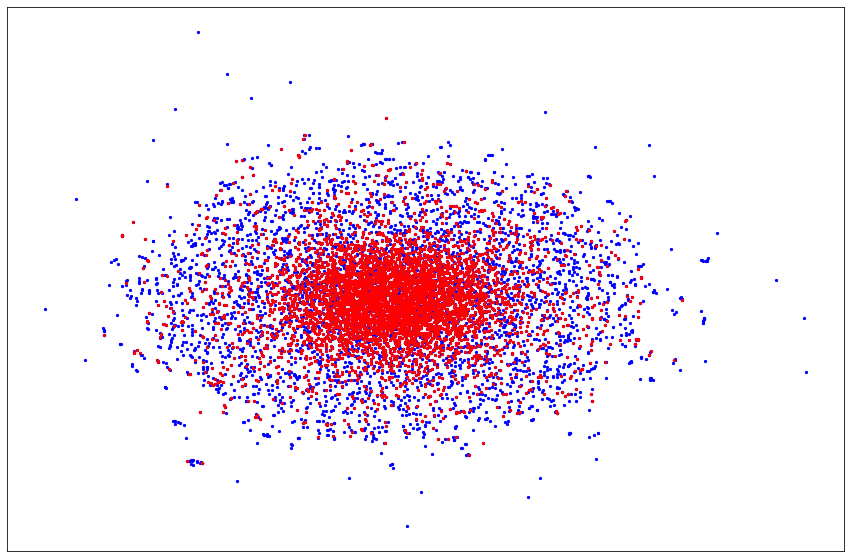

In [44]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(end_edges, pos,node_color = 'red', node_size=5)

## Score3

### 5 nodes with highest score3 is infected

In [45]:
result.sort_values('score3',ascending=False).head(5)

,Unnamed: 0,Unnamed: 0.1,degree_c,between_c,close_c,score1,score2,score3,score4
0,0,6494,0.013194,0.031051,0.308914,0.117720,0.096052,0.165518,0.091588
16,16,6836,0.007343,0.011533,0.287723,0.102200,0.079533,0.148580,0.078485
20,20,172,0.007113,0.005875,0.290562,0.101183,0.077356,0.148528,0.077666
13,13,174,0.007572,0.007704,0.289328,0.101535,0.078077,0.148483,0.078044
1,1,356,0.008375,0.008823,0.288313,0.101837,0.078583,0.148456,0.078472


In [46]:
# Model selection
model = ep.SIModel(G)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter("fraction_infected", 0.05)

# 5 nodes with highest score1 is infected.
infected_nodes = [6494,6836,172,174,356]


model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(51)

100%|██████████| 51/51 [00:02<00:00, 19.12it/s]


In [47]:
coverage = iterations[50]['node_count'][1]/8717 
print('coverage network : ', coverage)
speed = iterations[50]['node_count'][1]/50 
print('coverage speed network : ', speed)

coverage network :  0.6062865664792934
coverage speed network :  105.7


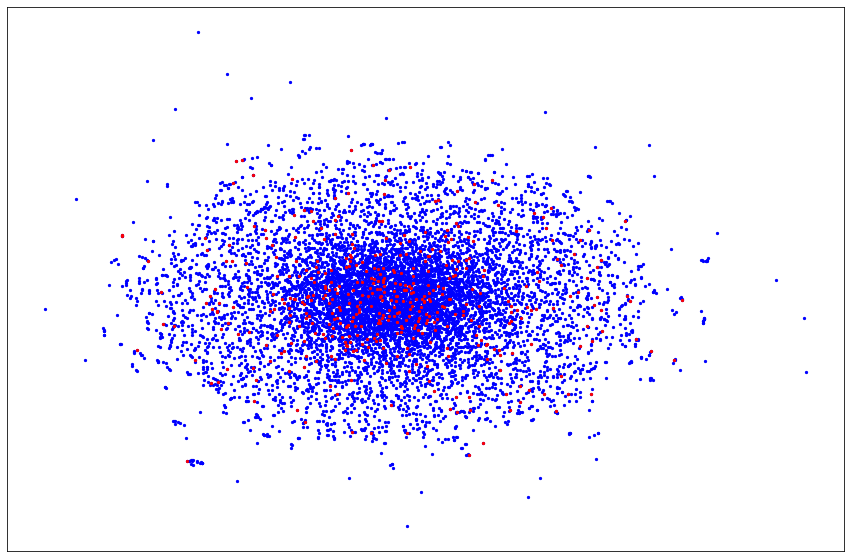

In [48]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(start_edges, pos,node_color = 'red', node_size=5)

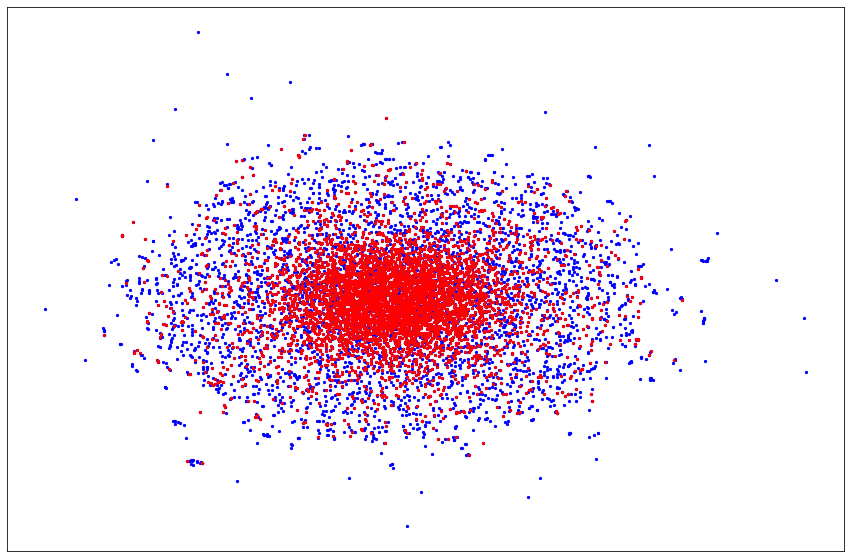

In [49]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(end_edges, pos,node_color = 'red', node_size=5)

### 10 nodes with highest score3 is infected

In [50]:
result.sort_values('score3',ascending=False).head(10)

,Unnamed: 0,Unnamed: 0.1,degree_c,between_c,close_c,score1,score2,score3,score4
0,0,6494,0.013194,0.031051,0.308914,0.117720,0.096052,0.165518,0.091588
16,16,6836,0.007343,0.011533,0.287723,0.102200,0.079533,0.148580,0.078485
20,20,172,0.007113,0.005875,0.290562,0.101183,0.077356,0.148528,0.077666
13,13,174,0.007572,0.007704,0.289328,0.101535,0.078077,0.148483,0.078044
1,1,356,0.008375,0.008823,0.288313,0.101837,0.078583,0.148456,0.078472
18,18,246,0.007228,0.006182,0.288609,0.100673,0.077050,0.147657,0.077312
14,14,99,0.007343,0.007206,0.287942,0.100830,0.077424,0.147608,0.077458
6,6,293,0.007916,0.006268,0.288104,0.100763,0.077139,0.147598,0.077551
3,3,556,0.008031,0.007228,0.286777,0.100679,0.077316,0.147203,0.077517
29,29,296,0.006540,0.004972,0.288275,0.099929,0.076189,0.147015,0.076582


In [51]:
# Model selection
model = ep.SIModel(G)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter("fraction_infected", 0.05)

# 5 nodes with highest score1 is infected.
infected_nodes = [6494,6836,172,174,356,246,99,293,556,296]


model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(51)

100%|██████████| 51/51 [00:02<00:00, 19.33it/s]


In [52]:
coverage = iterations[50]['node_count'][1]/8717 
print('coverage network : ', coverage)
speed = iterations[50]['node_count'][1]/50 
print('coverage speed network : ', speed)

coverage network :  0.6036480440518527
coverage speed network :  105.24


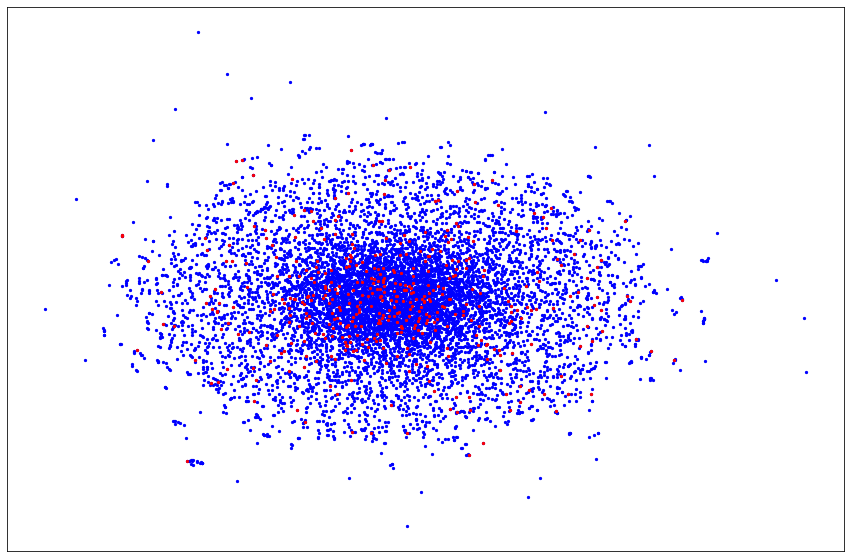

In [53]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(start_edges, pos,node_color = 'red', node_size=5)

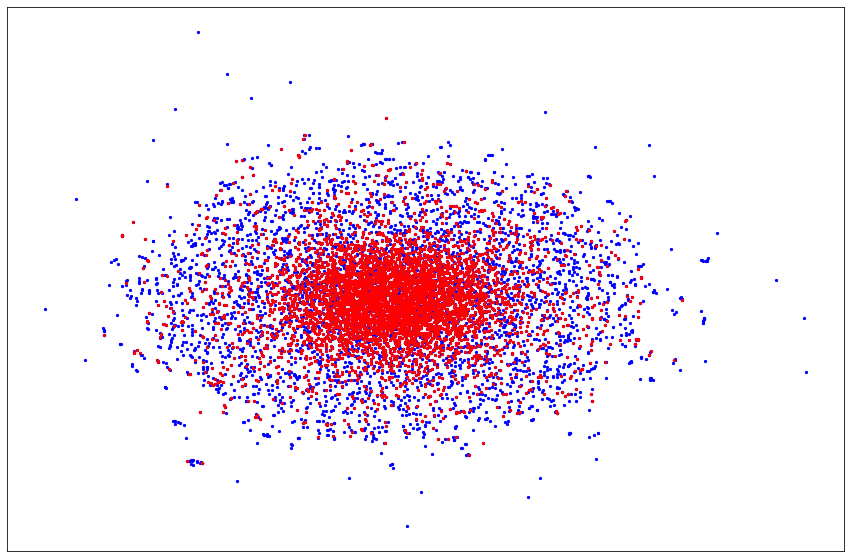

In [54]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(end_edges, pos,node_color = 'red', node_size=5)

## Score4

### 5 nodes with highest score4 is infected

In [55]:
result.sort_values('score4',ascending=False).head(5)

,Unnamed: 0,Unnamed: 0.1,degree_c,between_c,close_c,score1,score2,score3,score4
0,0,6494,0.013194,0.031051,0.308914,0.117720,0.096052,0.165518,0.091588
16,16,6836,0.007343,0.011533,0.287723,0.102200,0.079533,0.148580,0.078485
1,1,356,0.008375,0.008823,0.288313,0.101837,0.078583,0.148456,0.078472
13,13,174,0.007572,0.007704,0.289328,0.101535,0.078077,0.148483,0.078044
20,20,172,0.007113,0.005875,0.290562,0.101183,0.077356,0.148528,0.077666


In [56]:
# Model selection
model = ep.SIModel(G)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter("fraction_infected", 0.05)

# 5 nodes with highest score1 is infected.
infected_nodes = [6494,6836,356,174,172]


model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(51)

100%|██████████| 51/51 [00:02<00:00, 19.32it/s]


In [57]:
coverage = iterations[50]['node_count'][1]/8717 
print('coverage network : ', coverage)
speed = iterations[50]['node_count'][1]/50 
print('coverage speed network : ', speed)

coverage network :  0.5937822645405529
coverage speed network :  103.52


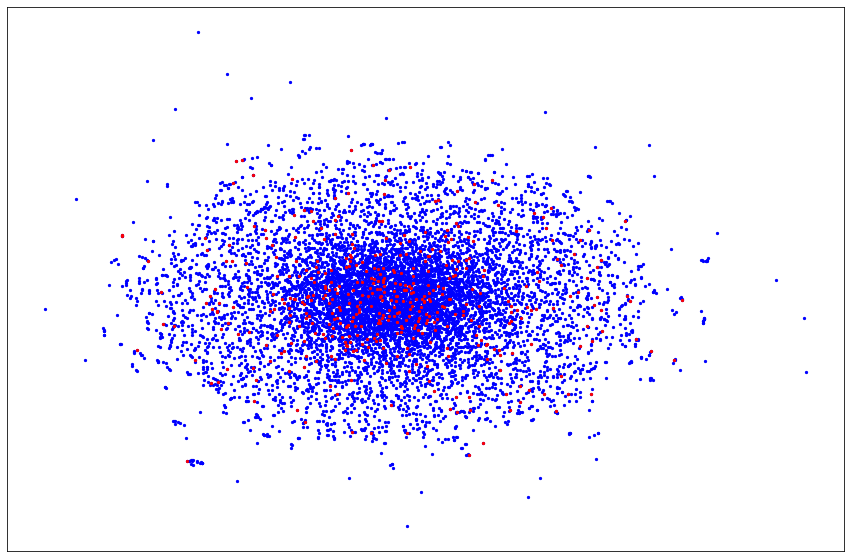

In [58]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(start_edges, pos,node_color = 'red', node_size=5)

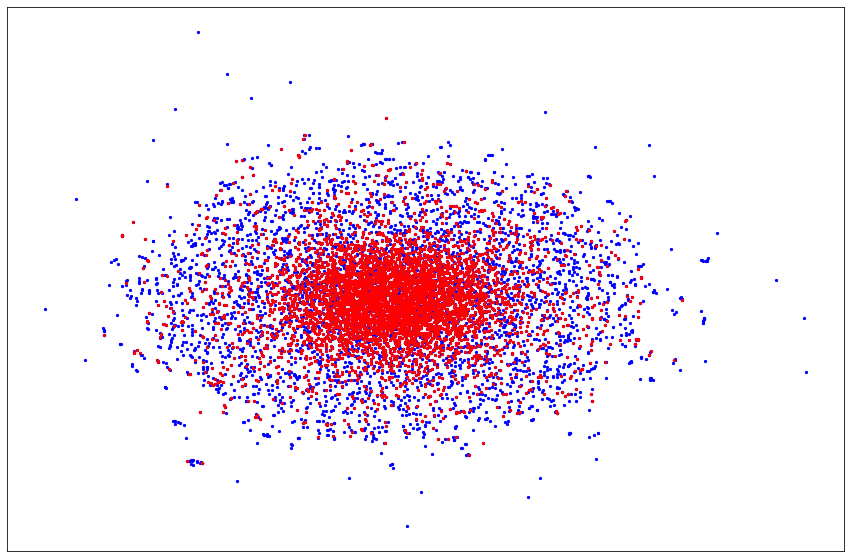

In [59]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(end_edges, pos,node_color = 'red', node_size=5)

 ### 10 nodes with highest score4 is infected

In [60]:
result.sort_values('score4',ascending=False).head(10)

,Unnamed: 0,Unnamed: 0.1,degree_c,between_c,close_c,score1,score2,score3,score4
0,0,6494,0.013194,0.031051,0.308914,0.117720,0.096052,0.165518,0.091588
16,16,6836,0.007343,0.011533,0.287723,0.102200,0.079533,0.148580,0.078485
1,1,356,0.008375,0.008823,0.288313,0.101837,0.078583,0.148456,0.078472
13,13,174,0.007572,0.007704,0.289328,0.101535,0.078077,0.148483,0.078044
20,20,172,0.007113,0.005875,0.290562,0.101183,0.077356,0.148528,0.077666
6,6,293,0.007916,0.006268,0.288104,0.100763,0.077139,0.147598,0.077551
3,3,556,0.008031,0.007228,0.286777,0.100679,0.077316,0.147203,0.077517
14,14,99,0.007343,0.007206,0.287942,0.100830,0.077424,0.147608,0.077458
18,18,246,0.007228,0.006182,0.288609,0.100673,0.077050,0.147657,0.077312
2,2,176,0.008261,0.006083,0.285555,0.099966,0.076496,0.146364,0.077040


In [61]:
# Model selection
model = ep.SIModel(G)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter("fraction_infected", 0.05)

# 5 nodes with highest score1 is infected.
infected_nodes = [6494,6836,356,174,172,293,556,99,246,176]


model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(51)

100%|██████████| 51/51 [00:02<00:00, 19.44it/s]


In [62]:
coverage = iterations[50]['node_count'][1]/8717 
print('coverage network : ', coverage)
speed = iterations[50]['node_count'][1]/50 
print('coverage speed network : ', speed)

coverage network :  0.5940117012733739
coverage speed network :  103.56


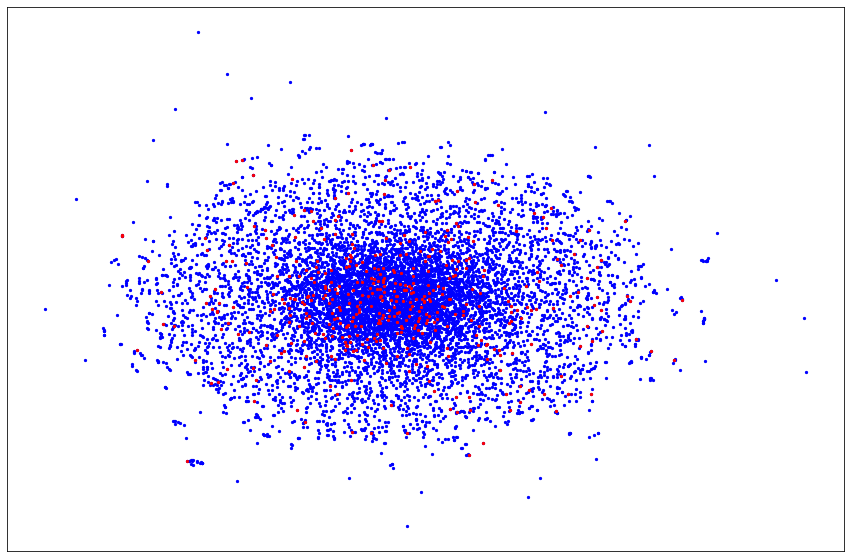

In [63]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(start_edges, pos,node_color = 'red', node_size=5)

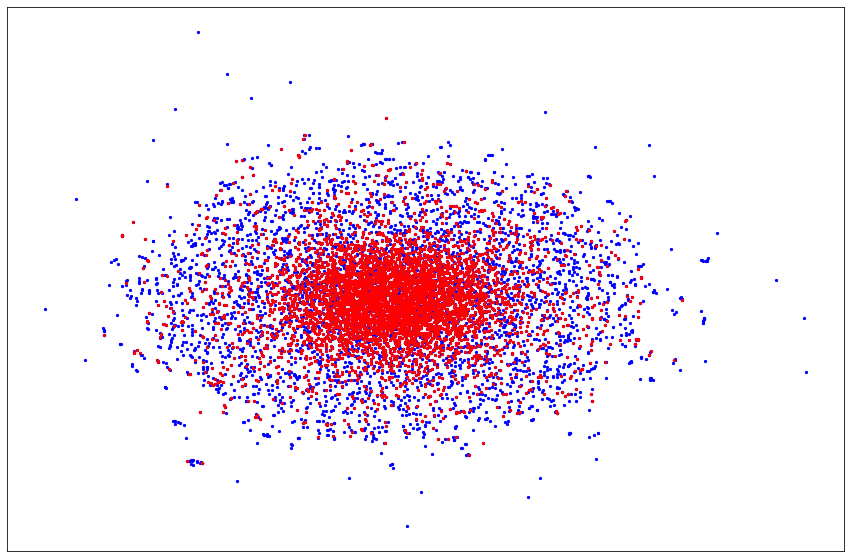

In [64]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(end_edges, pos,node_color = 'red', node_size=5)

# SIS model

\begin{equation}
    \text{Coverage} = \frac{\text{infectected node in end}}{\text{total node number}}
\end{equation}


\begin{equation}
    \text{Speed} = \frac{\text{infectected node in end}}{\text{number of iteration}}
\end{equation}

\begin{equation}
    \text{Score1} = \frac{\text{degree centrality}+ \text{closeness centrality}+\text{betweenness centerality}}{3}
\end{equation}

\begin{equation}
    \text{Score2} = \frac{\text{degree centrality}+ \text{closeness centrality}+2*\text{betweenness centerality}}{4}
\end{equation}

\begin{equation}
    \text{Score3} = \frac{\text{degree centrality}+ 2*\text{closeness centrality}+\text{betweenness centerality}}{4}
\end{equation}

\begin{equation}
    \text{Score4} = \frac{2*\text{degree centrality}+ \text{closeness centrality}+\text{betweenness centerality}}{4}
\end{equation}

SIS model for 50 iteration

| Condition | Coverage | Speed |
| --- | --- | --- |
| 5 nodes  , score 1 | 0.5755420442812894 | 100.34 |
| 10 nodes , score 1 |0.5568429505563841 |  97.08|
| --- | --- | --- |
| 5 nodes  , score 2 |0.558793162785362  | 97.42 |
| 10 nodes  , score 2 |0.5517953424343237  |  96.2|
| --- | --- | --- |
| 5 nodes  , score 3 | 0.5573018240220259 | 97.16 |
| 10 nodes  , score 3 |0.5536308362968911  | 96.52 |
| --- | --- | --- |
| 5 nodes  , score 4 | 0.5415854078237926 |  94.42|
| 10 nodes  , score 4 |  0.5556957668922795| 96.88 |


## Score1

### 5 nodes with highest score1 is infected



In [65]:
result.sort_values('score1',ascending=False).head(5)

,Unnamed: 0,Unnamed: 0.1,degree_c,between_c,close_c,score1,score2,score3,score4
0,0,6494,0.013194,0.031051,0.308914,0.117720,0.096052,0.165518,0.091588
16,16,6836,0.007343,0.011533,0.287723,0.102200,0.079533,0.148580,0.078485
1,1,356,0.008375,0.008823,0.288313,0.101837,0.078583,0.148456,0.078472
13,13,174,0.007572,0.007704,0.289328,0.101535,0.078077,0.148483,0.078044
20,20,172,0.007113,0.005875,0.290562,0.101183,0.077356,0.148528,0.077666


In [66]:
# Model selection
model = ep.SISModel(G)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter('lambda', 0.005)
cfg.add_model_parameter("fraction_infected", 0.05)

# 5 nodes with highest score1 is infected.
infected_nodes = [6494,6836,356,174,172]


model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(51)

100%|██████████| 51/51 [00:02<00:00, 19.04it/s]


In [67]:
for i,iter in enumerate(list(iterations)):
    if i%10 == 0 or i == 50:
        print('iteration : ',i)
        print(iter['node_count'])

iteration :  0
{0: 8282, 1: 435}
iteration :  10
{0: 7832, 1: 885}
iteration :  20
{0: 6893, 1: 1824}
iteration :  30
{0: 5792, 1: 2925}
iteration :  40
{0: 4696, 1: 4021}
iteration :  50
{0: 3778, 1: 4939}


In [68]:
coverage = iterations[50]['node_count'][1]/8717 
print('coverage network : ', coverage)
speed = iterations[50]['node_count'][1]/50 
print('coverage speed network : ', speed)

coverage network :  0.5665940117012733
coverage speed network :  98.78


In [69]:
start_edges = []
for key,value in iterations[0]['status'].items():
    if value == 1:
        start_edges.append(key)

len(start_edges)

435

In [70]:
end_edges = []
for i in range(51):
    for key,value in iterations[i]['status'].items():
        if value == 1:
            if key not in end_edges:
                end_edges.append(key)

len(end_edges)

5234

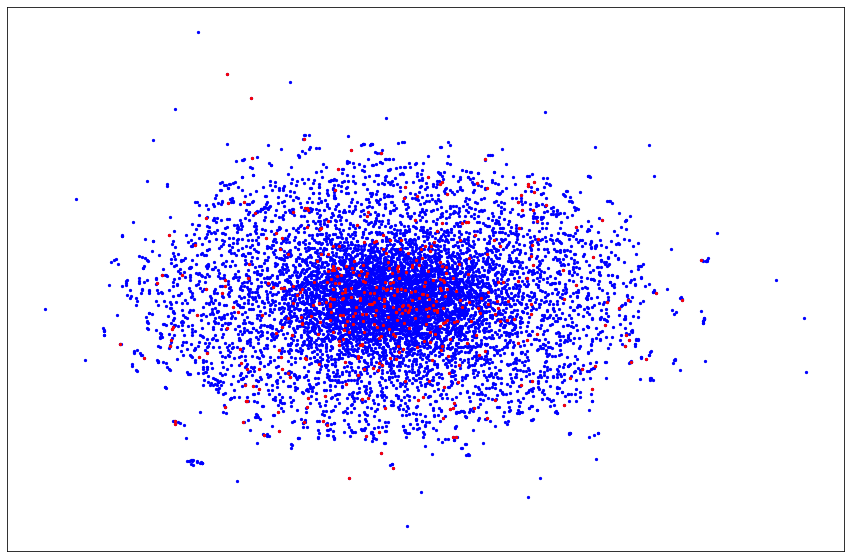

In [71]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(start_edges, pos,node_color = 'red', node_size=5)

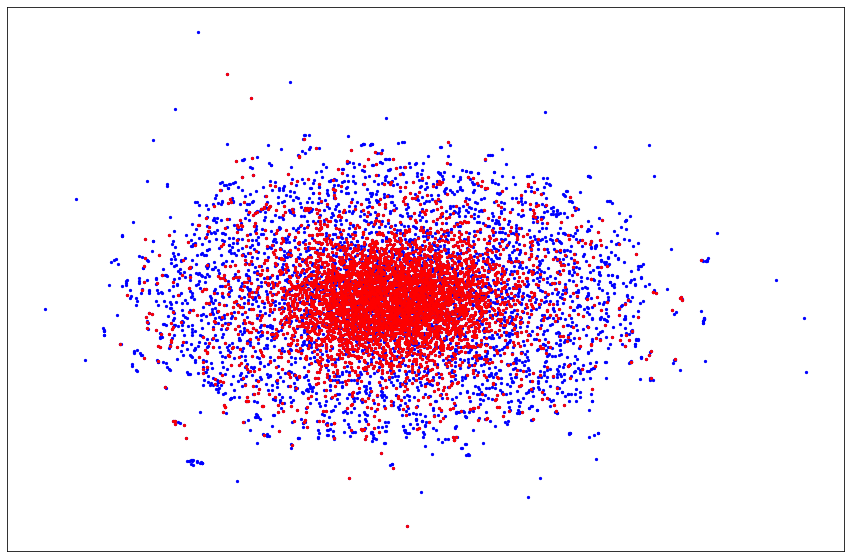

In [72]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(end_edges, pos,node_color = 'red', node_size=5)

### 10 nodes with highest score1 is infected



In [73]:
result.sort_values('score1',ascending=False).head(10)

,Unnamed: 0,Unnamed: 0.1,degree_c,between_c,close_c,score1,score2,score3,score4
0,0,6494,0.013194,0.031051,0.308914,0.117720,0.096052,0.165518,0.091588
16,16,6836,0.007343,0.011533,0.287723,0.102200,0.079533,0.148580,0.078485
1,1,356,0.008375,0.008823,0.288313,0.101837,0.078583,0.148456,0.078472
13,13,174,0.007572,0.007704,0.289328,0.101535,0.078077,0.148483,0.078044
20,20,172,0.007113,0.005875,0.290562,0.101183,0.077356,0.148528,0.077666
14,14,99,0.007343,0.007206,0.287942,0.100830,0.077424,0.147608,0.077458
6,6,293,0.007916,0.006268,0.288104,0.100763,0.077139,0.147598,0.077551
3,3,556,0.008031,0.007228,0.286777,0.100679,0.077316,0.147203,0.077517
18,18,246,0.007228,0.006182,0.288609,0.100673,0.077050,0.147657,0.077312
12,12,297,0.007572,0.007022,0.285958,0.100184,0.076893,0.146627,0.077031


In [74]:
# Model selection
model = ep.SISModel(G)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter('lambda', 0.005)
cfg.add_model_parameter("fraction_infected", 0.05)

# 5 nodes with highest score1 is infected.
infected_nodes = [6494,6836,356,174,172,99,293,556,246,297]


model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(51)

100%|██████████| 51/51 [00:02<00:00, 19.14it/s]


In [75]:
for i,iter in enumerate(list(iterations)):
    if i%10 == 0 or i == 50:
        print('iteration : ',i)
        print(iter['node_count'])

iteration :  0
{0: 8282, 1: 435}
iteration :  10
{0: 7855, 1: 862}
iteration :  20
{0: 7005, 1: 1712}
iteration :  30
{0: 5801, 1: 2916}
iteration :  40
{0: 4727, 1: 3990}
iteration :  50
{0: 3872, 1: 4845}


In [76]:
coverage = iterations[50]['node_count'][1]/8717 
print('coverage network : ', coverage)
speed = iterations[50]['node_count'][1]/50 
print('coverage speed network : ', speed)

coverage network :  0.5558104852586899
coverage speed network :  96.9


In [77]:
start_edges = []
for key,value in iterations[0]['status'].items():
    if value == 1:
        start_edges.append(key)

len(start_edges)

435

In [78]:
end_edges = []
for i in range(51):
    for key,value in iterations[i]['status'].items():
        if value == 1:
            if key not in end_edges:
                end_edges.append(key)

len(end_edges)

5151

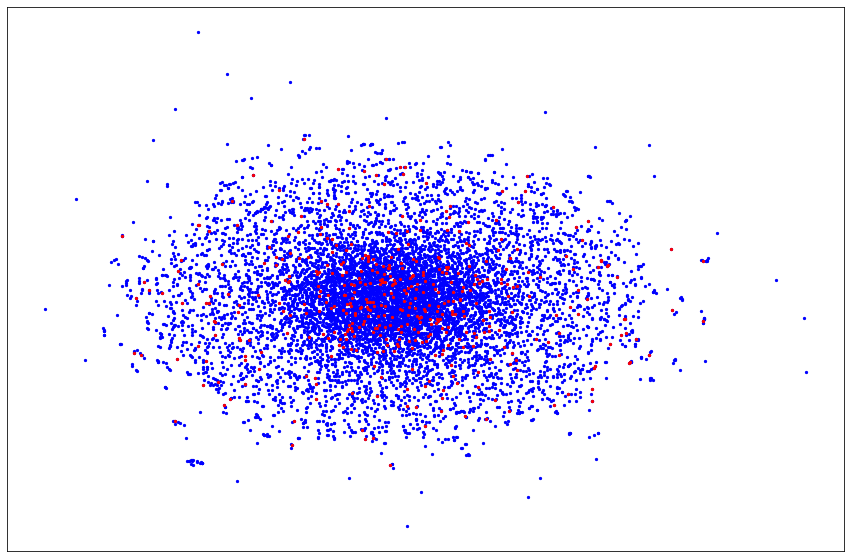

In [79]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(start_edges, pos,node_color = 'red', node_size=5)

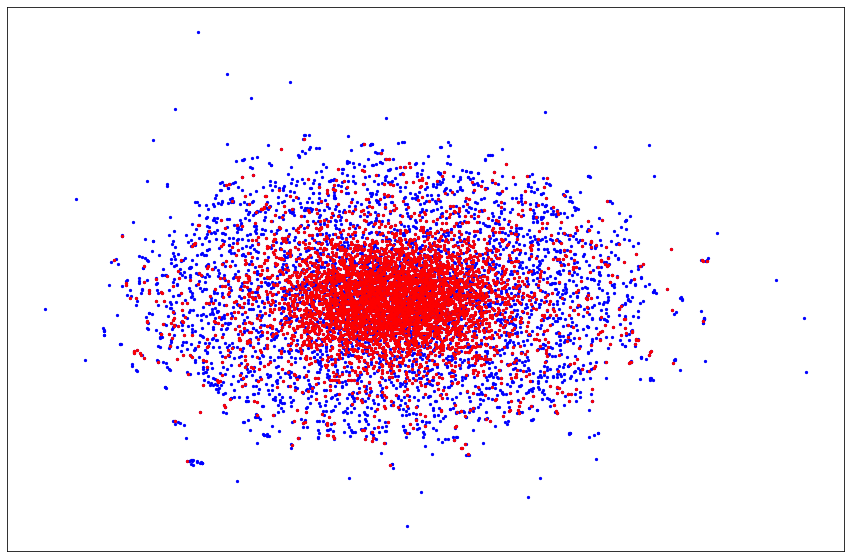

In [80]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(end_edges, pos,node_color = 'red', node_size=5)

## Score2

### 5 nodes with highest score2 is infected

In [81]:
result.sort_values('score2',ascending=False).head(5)

,Unnamed: 0,Unnamed: 0.1,degree_c,between_c,close_c,score1,score2,score3,score4
0,0,6494,0.013194,0.031051,0.308914,0.117720,0.096052,0.165518,0.091588
16,16,6836,0.007343,0.011533,0.287723,0.102200,0.079533,0.148580,0.078485
1,1,356,0.008375,0.008823,0.288313,0.101837,0.078583,0.148456,0.078472
13,13,174,0.007572,0.007704,0.289328,0.101535,0.078077,0.148483,0.078044
14,14,99,0.007343,0.007206,0.287942,0.100830,0.077424,0.147608,0.077458


In [82]:
# Model selection
model = ep.SISModel(G)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter('lambda', 0.005)
cfg.add_model_parameter("fraction_infected", 0.05)

# 5 nodes with highest score1 is infected.
infected_nodes = [6494,6836,356,174,99]


model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(51)

100%|██████████| 51/51 [00:02<00:00, 18.78it/s]


In [83]:
coverage = iterations[50]['node_count'][1]/8717 
print('coverage network : ', coverage)
speed = iterations[50]['node_count'][1]/50 
print('coverage speed network : ', speed)

coverage network :  0.558793162785362
coverage speed network :  97.42


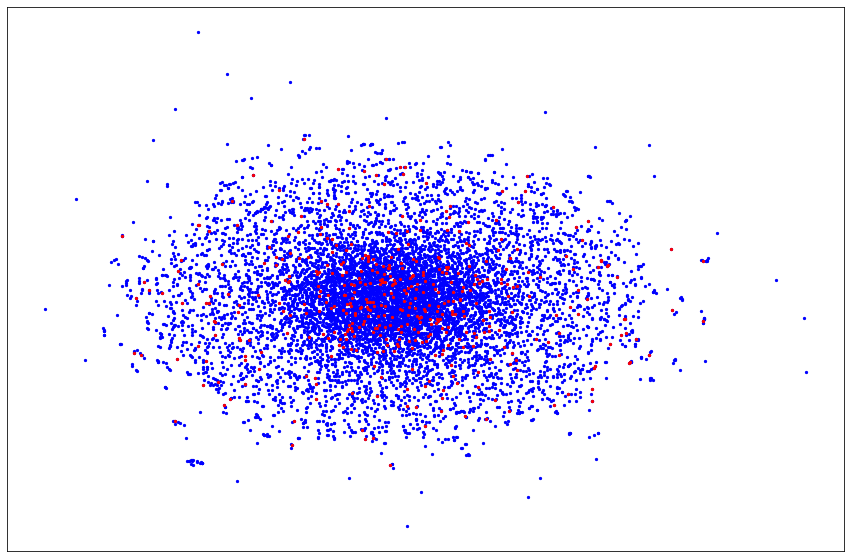

In [84]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(start_edges, pos,node_color = 'red', node_size=5)

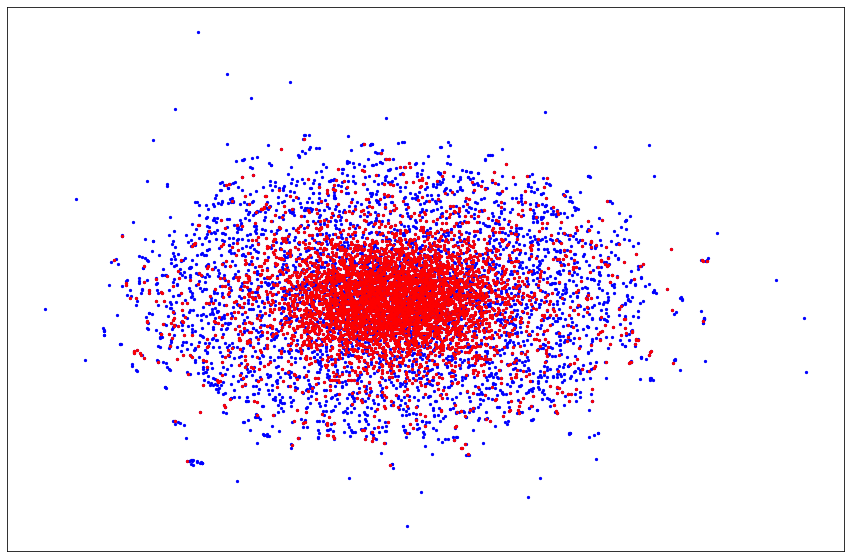

In [85]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(end_edges, pos,node_color = 'red', node_size=5)

### 10 nodes with highest score2 is infected

In [86]:
result.sort_values('score2',ascending=False).head(10)

,Unnamed: 0,Unnamed: 0.1,degree_c,between_c,close_c,score1,score2,score3,score4
0,0,6494,0.013194,0.031051,0.308914,0.117720,0.096052,0.165518,0.091588
16,16,6836,0.007343,0.011533,0.287723,0.102200,0.079533,0.148580,0.078485
1,1,356,0.008375,0.008823,0.288313,0.101837,0.078583,0.148456,0.078472
13,13,174,0.007572,0.007704,0.289328,0.101535,0.078077,0.148483,0.078044
14,14,99,0.007343,0.007206,0.287942,0.100830,0.077424,0.147608,0.077458
20,20,172,0.007113,0.005875,0.290562,0.101183,0.077356,0.148528,0.077666
3,3,556,0.008031,0.007228,0.286777,0.100679,0.077316,0.147203,0.077517
6,6,293,0.007916,0.006268,0.288104,0.100763,0.077139,0.147598,0.077551
18,18,246,0.007228,0.006182,0.288609,0.100673,0.077050,0.147657,0.077312
12,12,297,0.007572,0.007022,0.285958,0.100184,0.076893,0.146627,0.077031


In [87]:
# Model selection
model = ep.SISModel(G)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter('lambda', 0.005)
cfg.add_model_parameter("fraction_infected", 0.05)

# 5 nodes with highest score1 is infected.
infected_nodes = [6494,6836,356,174,99,172,556,293,246,297]


model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(51)

100%|██████████| 51/51 [00:02<00:00, 18.83it/s]


In [88]:
coverage = iterations[50]['node_count'][1]/8717 
print('coverage network : ', coverage)
speed = iterations[50]['node_count'][1]/50 
print('coverage speed network : ', speed)

coverage network :  0.5517953424343237
coverage speed network :  96.2


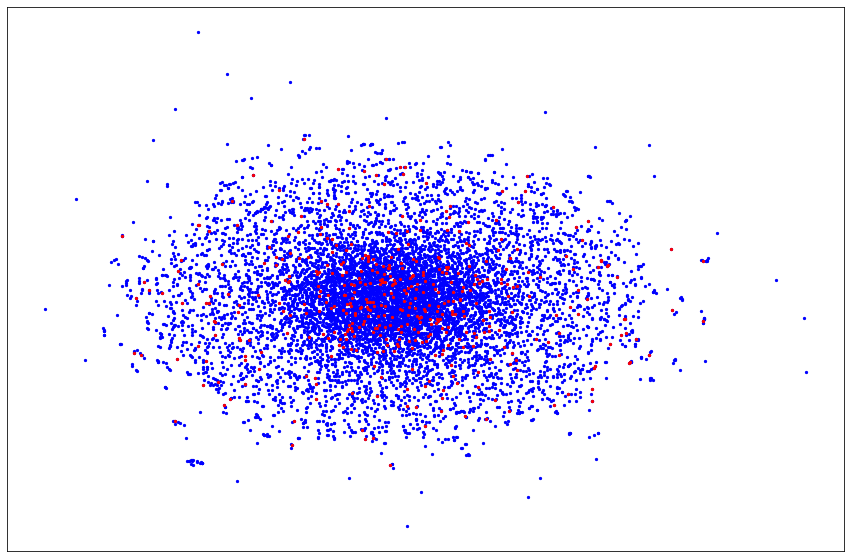

In [89]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(start_edges, pos,node_color = 'red', node_size=5)

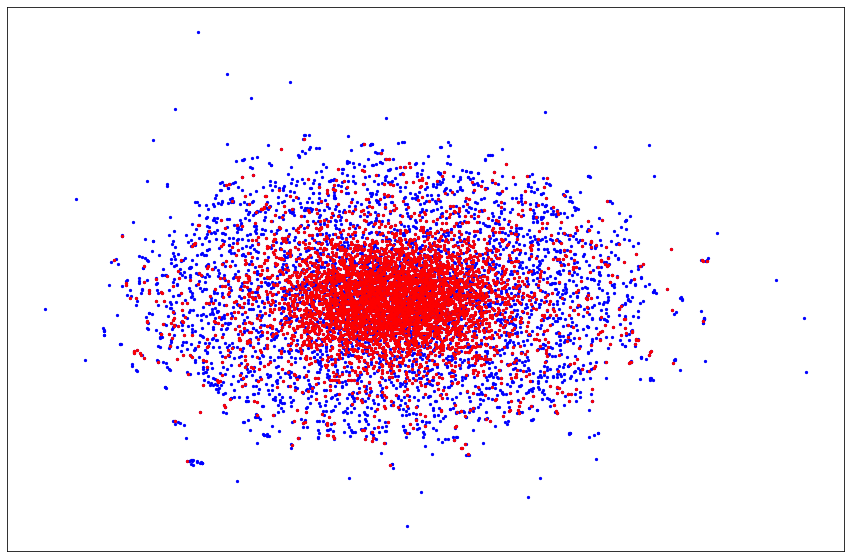

In [90]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(end_edges, pos,node_color = 'red', node_size=5)

## Score3

### 5 nodes with highest score3 is infected

In [91]:
result.sort_values('score3',ascending=False).head(5)

,Unnamed: 0,Unnamed: 0.1,degree_c,between_c,close_c,score1,score2,score3,score4
0,0,6494,0.013194,0.031051,0.308914,0.117720,0.096052,0.165518,0.091588
16,16,6836,0.007343,0.011533,0.287723,0.102200,0.079533,0.148580,0.078485
20,20,172,0.007113,0.005875,0.290562,0.101183,0.077356,0.148528,0.077666
13,13,174,0.007572,0.007704,0.289328,0.101535,0.078077,0.148483,0.078044
1,1,356,0.008375,0.008823,0.288313,0.101837,0.078583,0.148456,0.078472


In [92]:
# Model selection
model = ep.SISModel(G)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter('lambda', 0.005)
cfg.add_model_parameter("fraction_infected", 0.05)

# 5 nodes with highest score1 is infected.
infected_nodes = [6494,6836,172,174,356]


model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(51)

100%|██████████| 51/51 [00:02<00:00, 19.14it/s]


In [93]:
coverage = iterations[50]['node_count'][1]/8717 
print('coverage network : ', coverage)
speed = iterations[50]['node_count'][1]/50 
print('coverage speed network : ', speed)

coverage network :  0.5573018240220259
coverage speed network :  97.16


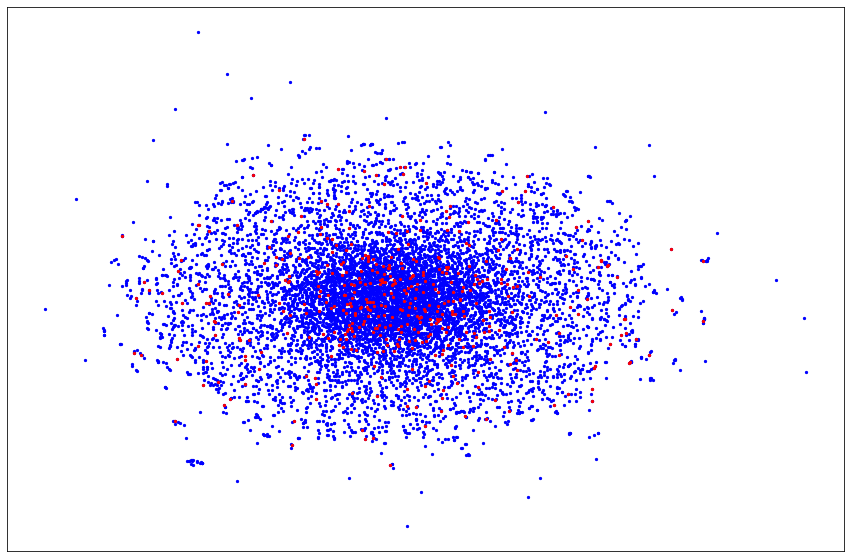

In [94]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(start_edges, pos,node_color = 'red', node_size=5)

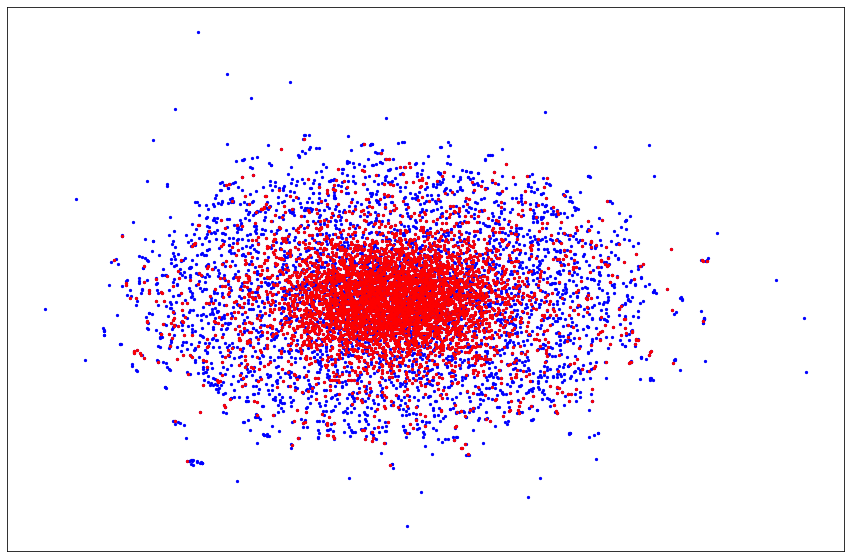

In [95]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(end_edges, pos,node_color = 'red', node_size=5)

### 10 nodes with highest score3 is infected

In [96]:
result.sort_values('score3',ascending=False).head(10)

,Unnamed: 0,Unnamed: 0.1,degree_c,between_c,close_c,score1,score2,score3,score4
0,0,6494,0.013194,0.031051,0.308914,0.117720,0.096052,0.165518,0.091588
16,16,6836,0.007343,0.011533,0.287723,0.102200,0.079533,0.148580,0.078485
20,20,172,0.007113,0.005875,0.290562,0.101183,0.077356,0.148528,0.077666
13,13,174,0.007572,0.007704,0.289328,0.101535,0.078077,0.148483,0.078044
1,1,356,0.008375,0.008823,0.288313,0.101837,0.078583,0.148456,0.078472
18,18,246,0.007228,0.006182,0.288609,0.100673,0.077050,0.147657,0.077312
14,14,99,0.007343,0.007206,0.287942,0.100830,0.077424,0.147608,0.077458
6,6,293,0.007916,0.006268,0.288104,0.100763,0.077139,0.147598,0.077551
3,3,556,0.008031,0.007228,0.286777,0.100679,0.077316,0.147203,0.077517
29,29,296,0.006540,0.004972,0.288275,0.099929,0.076189,0.147015,0.076582


In [97]:
# Model selection
model = ep.SISModel(G)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter('lambda', 0.005)
cfg.add_model_parameter("fraction_infected", 0.05)

# 5 nodes with highest score1 is infected.
infected_nodes = [6494,6836,172,174,356,246,99,293,556,296]


model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(51)

100%|██████████| 51/51 [00:02<00:00, 19.45it/s]


In [98]:
coverage = iterations[50]['node_count'][1]/8717 
print('coverage network : ', coverage)
speed = iterations[50]['node_count'][1]/50 
print('coverage speed network : ', speed)

coverage network :  0.5536308362968911
coverage speed network :  96.52


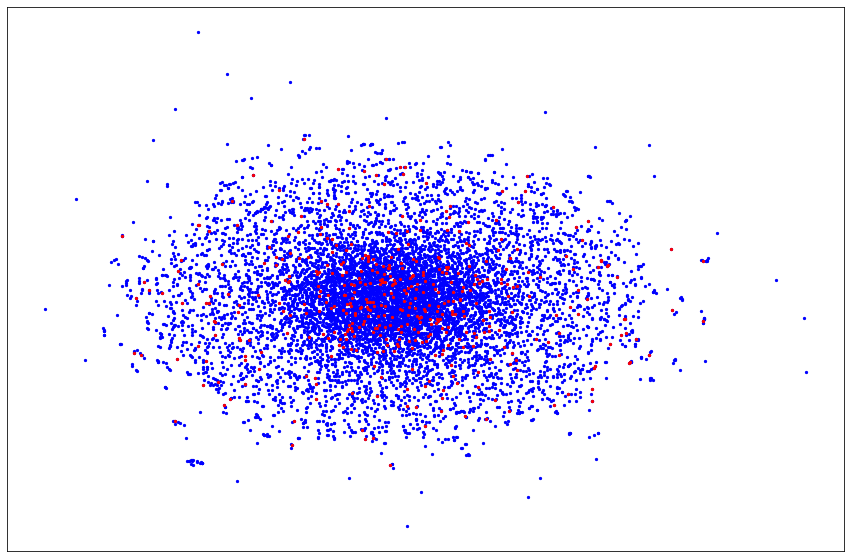

In [99]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(start_edges, pos,node_color = 'red', node_size=5)

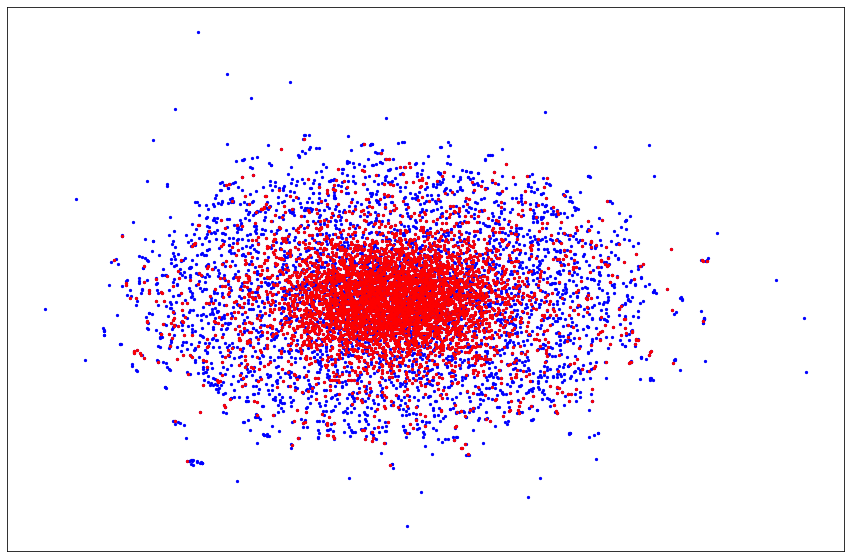

In [100]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(end_edges, pos,node_color = 'red', node_size=5)

## Score4

### 5 nodes with highest score4 is infected

In [101]:
result.sort_values('score4',ascending=False).head(5)

,Unnamed: 0,Unnamed: 0.1,degree_c,between_c,close_c,score1,score2,score3,score4
0,0,6494,0.013194,0.031051,0.308914,0.117720,0.096052,0.165518,0.091588
16,16,6836,0.007343,0.011533,0.287723,0.102200,0.079533,0.148580,0.078485
1,1,356,0.008375,0.008823,0.288313,0.101837,0.078583,0.148456,0.078472
13,13,174,0.007572,0.007704,0.289328,0.101535,0.078077,0.148483,0.078044
20,20,172,0.007113,0.005875,0.290562,0.101183,0.077356,0.148528,0.077666


In [102]:
# Model selection
model = ep.SISModel(G)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter('lambda', 0.005)
cfg.add_model_parameter("fraction_infected", 0.05)

# 5 nodes with highest score1 is infected.
infected_nodes = [6494,6836,356,174,172]


model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(51)

100%|██████████| 51/51 [00:02<00:00, 19.01it/s]


In [103]:
coverage = iterations[50]['node_count'][1]/8717 
print('coverage network : ', coverage)
speed = iterations[50]['node_count'][1]/50 
print('coverage speed network : ', speed)

coverage network :  0.5415854078237926
coverage speed network :  94.42


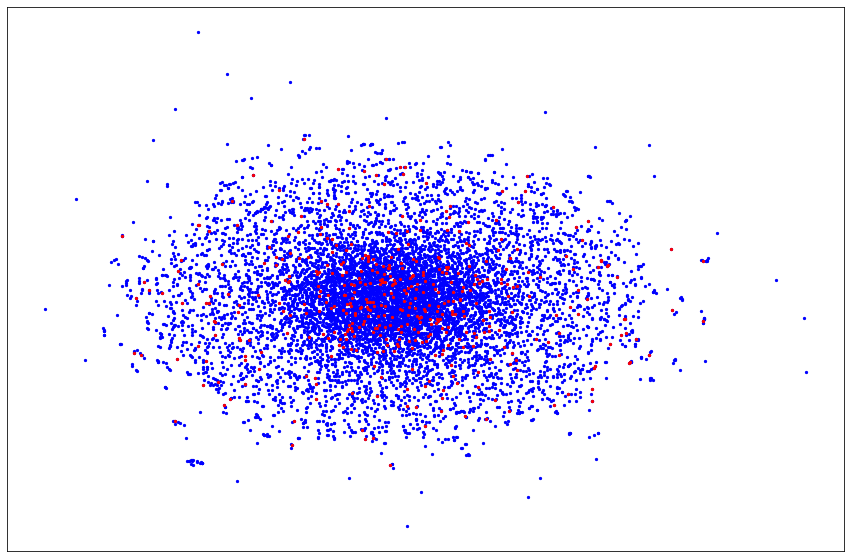

In [104]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(start_edges, pos,node_color = 'red', node_size=5)

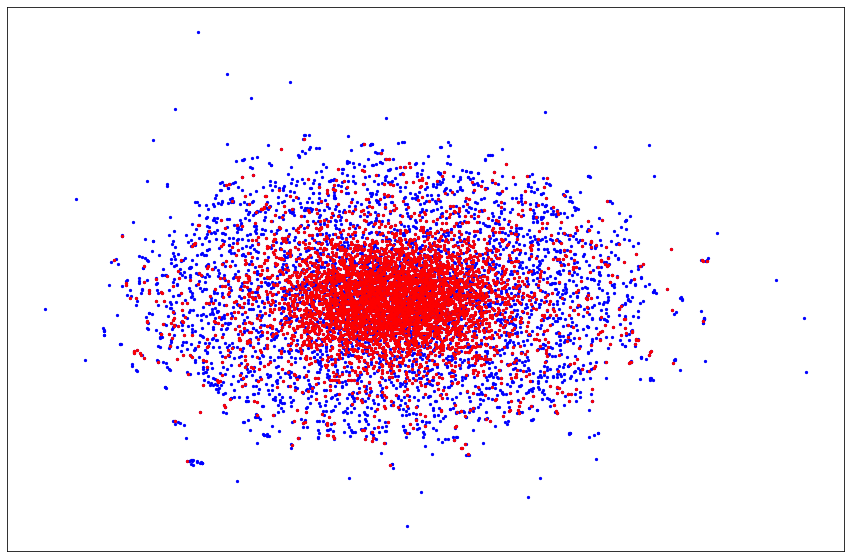

In [105]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(end_edges, pos,node_color = 'red', node_size=5)

 ### 10 nodes with highest score4 is infected

In [106]:
result.sort_values('score4',ascending=False).head(10)

,Unnamed: 0,Unnamed: 0.1,degree_c,between_c,close_c,score1,score2,score3,score4
0,0,6494,0.013194,0.031051,0.308914,0.117720,0.096052,0.165518,0.091588
16,16,6836,0.007343,0.011533,0.287723,0.102200,0.079533,0.148580,0.078485
1,1,356,0.008375,0.008823,0.288313,0.101837,0.078583,0.148456,0.078472
13,13,174,0.007572,0.007704,0.289328,0.101535,0.078077,0.148483,0.078044
20,20,172,0.007113,0.005875,0.290562,0.101183,0.077356,0.148528,0.077666
6,6,293,0.007916,0.006268,0.288104,0.100763,0.077139,0.147598,0.077551
3,3,556,0.008031,0.007228,0.286777,0.100679,0.077316,0.147203,0.077517
14,14,99,0.007343,0.007206,0.287942,0.100830,0.077424,0.147608,0.077458
18,18,246,0.007228,0.006182,0.288609,0.100673,0.077050,0.147657,0.077312
2,2,176,0.008261,0.006083,0.285555,0.099966,0.076496,0.146364,0.077040


In [107]:
# Model selection
model = ep.SISModel(G)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter('lambda', 0.005)
cfg.add_model_parameter("fraction_infected", 0.05)

# 5 nodes with highest score1 is infected.
infected_nodes = [6494,6836,356,174,172,293,556,99,246,176]


model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(51)

100%|██████████| 51/51 [00:02<00:00, 19.01it/s]


In [108]:
coverage = iterations[50]['node_count'][1]/8717 
print('coverage network : ', coverage)
speed = iterations[50]['node_count'][1]/50 
print('coverage speed network : ', speed)

coverage network :  0.5556957668922795
coverage speed network :  96.88


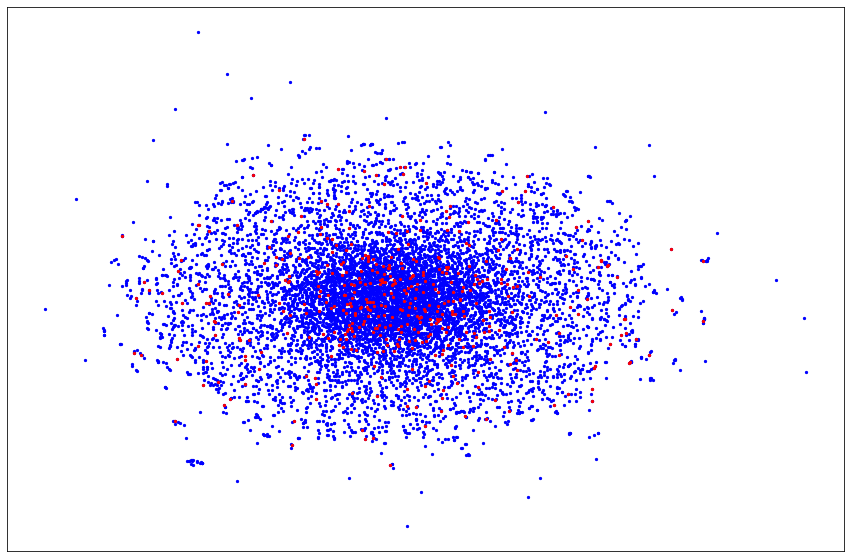

In [109]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(start_edges, pos,node_color = 'red', node_size=5)

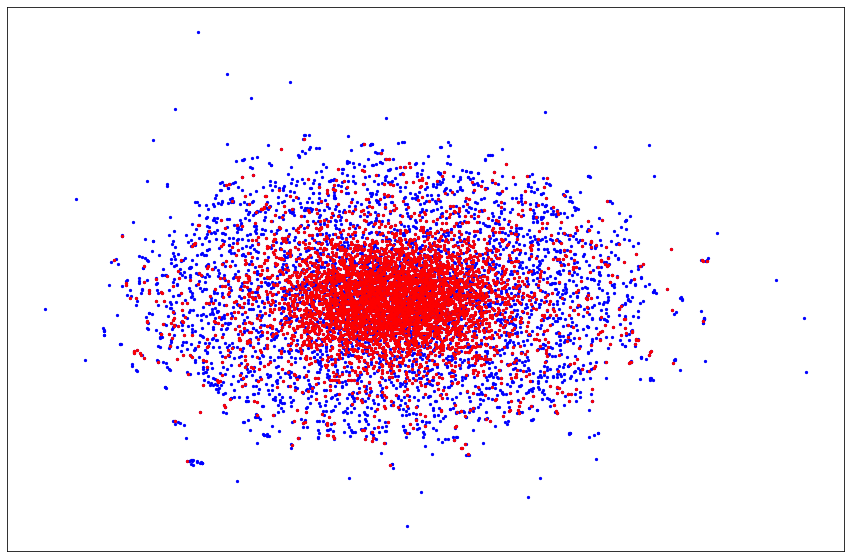

In [110]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(end_edges, pos,node_color = 'red', node_size=5)